       breed_encoded
count     888.000000
mean        2.087838
std         1.423411
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000


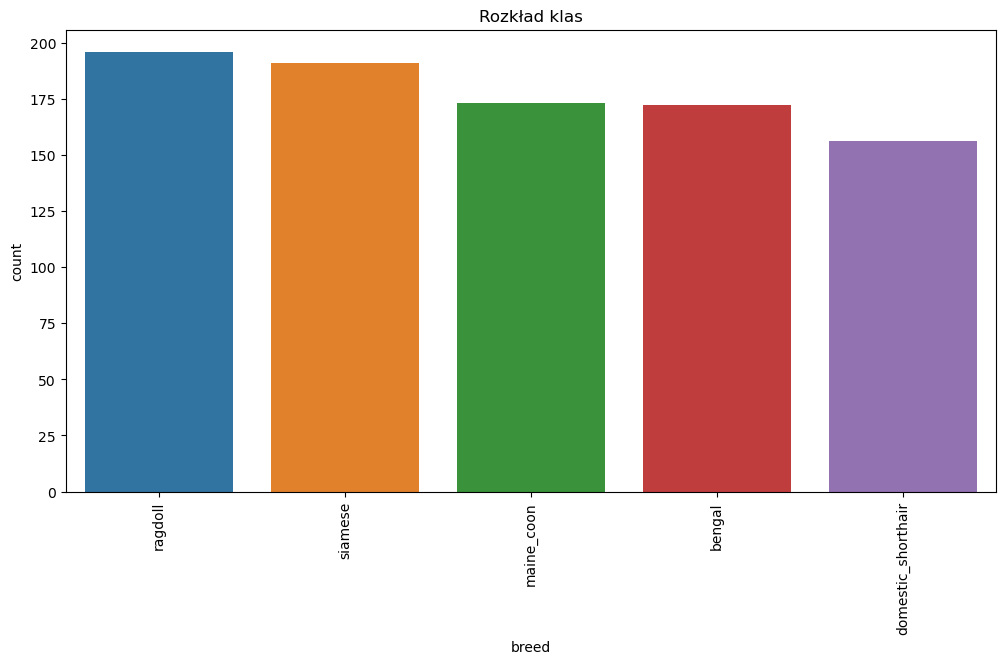

Epoch 1/15, Loss: 1.7311, Accuracy: 0.2141
Epoch 2/15, Loss: 1.4613, Accuracy: 0.3944
Epoch 3/15, Loss: 1.3387, Accuracy: 0.4634
Epoch 4/15, Loss: 1.1659, Accuracy: 0.5437
Epoch 5/15, Loss: 0.9829, Accuracy: 0.6268
Epoch 6/15, Loss: 0.7912, Accuracy: 0.7493
Epoch 7/15, Loss: 0.5805, Accuracy: 0.8254
Epoch 8/15, Loss: 0.4660, Accuracy: 0.8606
Epoch 9/15, Loss: 0.3095, Accuracy: 0.9310
Epoch 10/15, Loss: 0.1843, Accuracy: 0.9620
Epoch 11/15, Loss: 0.1192, Accuracy: 0.9831
Epoch 12/15, Loss: 0.0849, Accuracy: 0.9873
Epoch 13/15, Loss: 0.0516, Accuracy: 0.9930
Epoch 14/15, Loss: 0.0284, Accuracy: 0.9972
Epoch 15/15, Loss: 0.0195, Accuracy: 0.9972


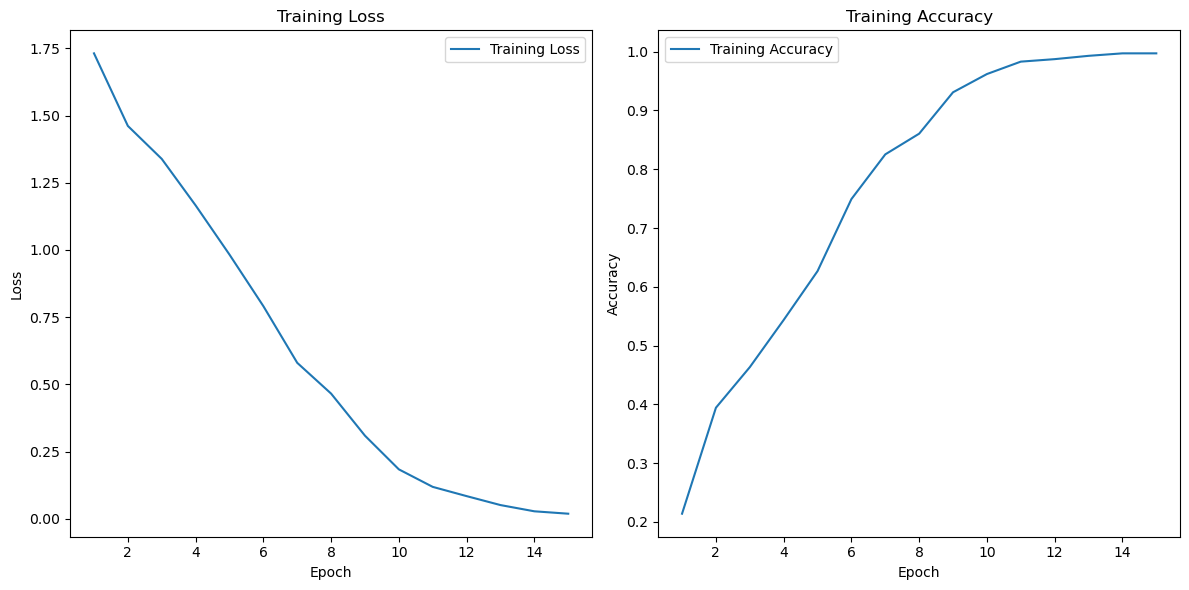

Dokładność modelu na danych testowych: 0.3876
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.47      0.54      0.51        35
           1       0.21      0.17      0.19        29
           2       0.34      0.29      0.32        34
           3       0.46      0.63      0.53        38
           4       0.33      0.26      0.29        42

    accuracy                           0.39       178
   macro avg       0.36      0.38      0.37       178
weighted avg       0.37      0.39      0.37       178

Macierz pomyłek:
 [[19  4  8  1  3]
 [ 4  5  7  5  8]
 [10  6 10  5  3]
 [ 2  4  0 24  8]
 [ 5  5  4 17 11]]
Sprawdzanie ścieżki: C:\Proj-Adam Rolbiecki i Damian Chmielewski\Zbiór danych\images\Images\cat_v1
Czy katalog istnieje? True
Zawartość katalogu: ['bengal', 'domestic_shorthair', 'maine_coon', 'ragdoll', 'siamese']
Found 763 images belonging to 5 classes.
Liczba klas w zbiorze treningowym: 5
Found 188 images belonging to 5 classes.


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 131s 5s/step - loss: 2.2051 - accuracy: 0.6619 - precision_3: 0.6949 - recall_3: 0.5911 - val_loss: 0.5370 - val_accuracy: 0.8191 - val_precision_3: 0.8492 - val_recall_3: 0.8085
Epoch 2/15
24/24 [==============================] - 112s 5s/step - loss: 0.4454 - accuracy: 0.8270 - precision_3: 0.8547 - recall_3: 0.8021 - val_loss: 0.6079 - val_accuracy: 0.7660 - val_precision_3: 0.7886 - val_recall_3: 0.7340
Epoch 3/15
24/24 [==============================] - 112s 5s/step - loss: 0.3231 - accuracy: 0.8886 - precision_3: 0.9065 - recall_3: 0.8637 - val_loss: 0.4440 - val_accuracy: 0.8404 - val_precision_3: 0.8564 - val_recall_3: 0.8245
Epoch 4/15
24/24 [==============================] - 110s 5s/step - loss: 0.1937 - accuracy: 0.9436 - precision_3: 0.9593 - recall_3: 0.9266 - val_loss: 0.5049 - val_accuracy: 0.8191 - val_precision_3: 0.8297 - val_recall_3: 0.8032
Epoch 5/15
24/24 [==============================] - 105s 4s/step - loss: 0.1321 - accur

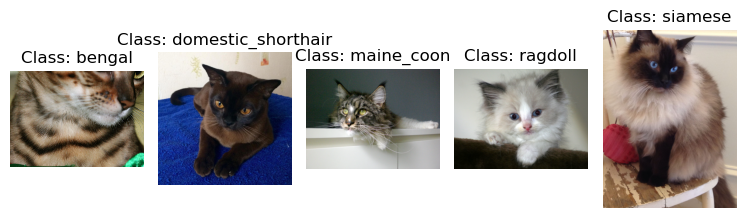

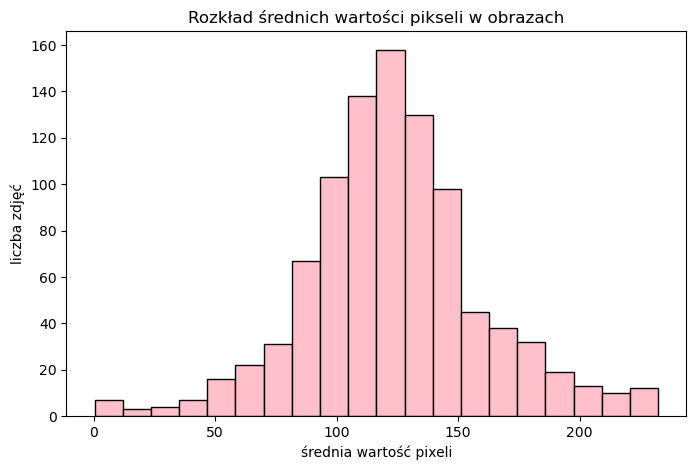

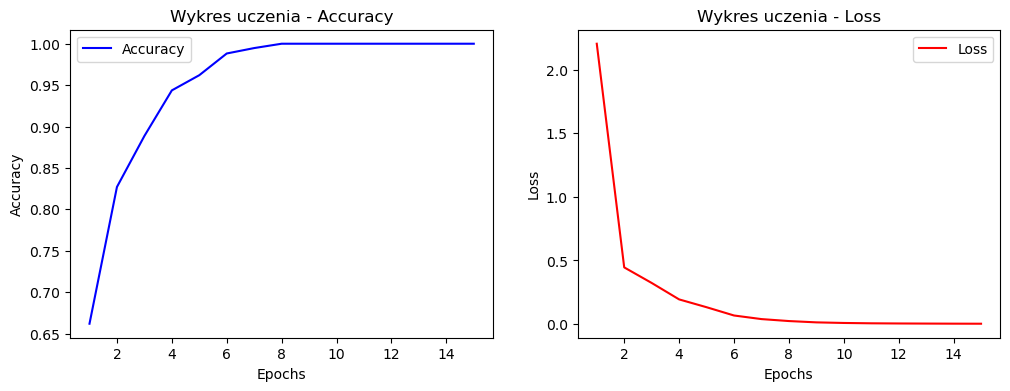

In [14]:
#PyTorch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image
#TensorFlow
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall
#####################################
#              PyTorch              #
#####################################
# Ustalanie urządzenia CUDA, jeśli dostępne
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ścieżka do folderów z obrazami
base_path = r"C:\Proj-Adam Rolbiecki i Damian Chmielewski\Zbiór danych\images\Images\cat_v1"



# Lista, która będzie przechowywać ścieżki do obrazów
image_paths = []
labels = []

# Przejście przez foldery ras psów
for breed_folder in os.listdir(base_path):
    breed_path = os.path.join(base_path, breed_folder)

    # Sprawdzenie, czy to jest folder
    if os.path.isdir(breed_path):
        # Przejście przez pliki wewnątrz folderu rasy psa
        for filename in os.listdir(breed_path):
            if filename.endswith(".jpg"):
                image_path = os.path.join(breed_path, filename)
                image_paths.append(image_path)
                labels.append(breed_folder)

# Utworzenie DataFrame z danymi
data = pd.DataFrame({"image_path": image_paths, "breed": labels})

# Zakodowanie etykiet klas
label_encoder = LabelEncoder()
data['breed_encoded'] = label_encoder.fit_transform(data['breed'])

# Klasyfikator CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=2, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, len(label_encoder.classes_))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Przetwarzanie danych za pomocą PyTorch
class DogDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]

        # Wczytaj obraz za pomocą PIL.Image zamiast plt.imread
        img = Image.open(img_path).convert('RGB')

        label = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)

        if self.transform:
            img = self.transform(img)

        return img, label

# Wczytanie i przetworzenie obrazów za pomocą PyTorch
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = DogDataset(data, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Eksploracyjna analiza danych (EDA)
# 1. Statystyki podstawowe
print(data.describe())

# 2. Wizualizacja rozkładu klas
plt.figure(figsize=(12, 6))
sns.countplot(x='breed', data=data, order=data['breed'].value_counts().index)
plt.title('Rozkład klas')
plt.xticks(rotation=90)
plt.show()

# Podział danych na zestawy treningowe i testowe
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Stworzenie modelu
model = SimpleCNN().to(device)

# Definicja funkcji straty i optymalizatora
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenowanie modelu
num_epochs = 15
train_losses = []
train_accuracies = []

# Ścieżka do zapisywania modelu
model_save_path_base = "saved_model_epoch_{}.pth"

import os

save_dir = 'C:/path_to_save_directory/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Obliczanie liczby poprawnych predykcji
        _, predictions = torch.max(outputs, 1)
        correct_predictions += (predictions == labels).sum().item()

    # Obliczanie dokładności i wypisywanie wyników
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions / len(train_loader.dataset)

    # Zapisywanie wartości metryk
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}')

    # Zapisz model po każdej epoce
    torch.save(model.state_dict(), os.path.join(save_dir, 'model_epoch_{}.pth'.format(epoch + 1)))


# Rysowanie wykresów accuracy oraz loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Testowanie modelu
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Ocena dokładności modelu na danych testowych
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Dokładność modelu na danych testowych: {test_accuracy:.4f}")

# Inne metryki oceny
print("Raport klasyfikacji:\n", classification_report(all_labels, all_predictions))
print("Macierz pomyłek:\n", confusion_matrix(all_labels, all_predictions))

#####################################
#            TensorFlow             #
#####################################

# definicja hiperparametrów
batch_size = 32
epochs = 15
num_classes = 120
train_data_dir = r"C:\Proj-Adam Rolbiecki i Damian Chmielewski\Zbiór danych\images\Images\cat_v1"
print("Sprawdzanie ścieżki:", train_data_dir)
print("Czy katalog istnieje?", os.path.exists(train_data_dir))
print("Zawartość katalogu:", os.listdir(train_data_dir))

# przygotowanie generatorów danych szkoleniowych i walidacyjnych
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

# trening
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Teraz uzyskaj liczbę klas
num_classes = train_generator.num_classes
print(f"Liczba klas w zbiorze treningowym: {num_classes}")

# walidacja
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# definicja modelu
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base_model.trainable = False

mdl = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


# kompilacja modelu
mdl.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy', Precision(), Recall()])

# trenowanie modelu
history = mdl.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('model_epoch_{epoch}.h5')])



# funkcje pomocnicze
def calculate_f1_score(precision, recall):
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


def evaluate_metrics(mdl, data_generator):
    y_true = data_generator.classes
    y_pred = mdl.predict(data_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    precision_metric = Precision()
    recall_metric = Recall()

    precision_value = precision_metric(y_true, y_pred_classes).numpy()
    recall_value = recall_metric(y_true, y_pred_classes).numpy()
    f1_value = calculate_f1_score(precision_value, recall_value)

    print("precyzja: {:.4f}".format(precision_value))
    print("czułość: {:.4f}".format(recall_value))
    print("F1 score: {:.4f}".format(f1_value))
    print("")


# ocena modelu
evaluate_metrics(mdl, validation_generator)


# sprawdzanie liczby zdjęć w każdej klasie
def check_class_counts(data_dir):
    class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name)))
                    for class_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_name))}
    print("liczba obrazów na klase:")
    print(class_counts)
    return class_counts


# wyświelanie rsandomowego obrazu z każdej klasy
def display_random_images(data_dir, class_counts):
    num_classes = len(class_counts)
    cols = 8  # lość kolumn
    rows = (num_classes + cols - 1) // cols  # obliczanie ilości wierszy potrzebnych do wyświetlenia wszystkich klas

    plt.figure(figsize=(12, 4 * rows))
    class_names = list(class_counts.keys())

    for i, class_name in enumerate(class_names, 1):
        random_image = random.choice(os.listdir(os.path.join(data_dir, class_name)))
        img_path = os.path.join(data_dir, class_name, random_image)
        img = plt.imread(img_path)

        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(f'Class: {class_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


class_counts = check_class_counts(train_data_dir)
display_random_images(train_data_dir, class_counts)


# funkcja do sprawdzania rozkładu pikseli
def check_pixel_distribution(data_dir):
    pixel_distribution = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            img = plt.imread(image_path)
            average_pixel_value = np.mean(img)
            pixel_distribution.append(average_pixel_value)

    plt.figure(figsize=(8, 5))
    plt.hist(pixel_distribution, bins=20, color='pink', edgecolor='black')
    plt.title('Rozkład średnich wartości pikseli w obrazach')
    plt.xlabel('średnia wartość pixeli')
    plt.ylabel('liczba zdjęć')
    plt.show()


check_pixel_distribution(train_data_dir)


# wykresy uczenia się modelu
def plot_learning_curve(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'b', label='Accuracy')
    plt.title('Wykres uczenia - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'r', label='Loss')
    plt.title('Wykres uczenia - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_learning_curve(history)